## Transfer Learning VGG 16 and VGG 19 using Keras

ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images.The network has an image input size of 224-by-224.



In [1]:
# import the libraries as shown below:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this  as resnet takes only images of size [224,244]
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
                    # + [3] means the image channel is RGB. 
                    # weights is taken as imagenet as we are taking the same weights that  
                    # were used in the Imagenet competetion.
                    # include_top = False because we dont want to include the top layer


In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
#we don't train existing weights as they are already trianed, we will the last layer
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)    # flattening the layers

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

##### Till here our model is completed

In [11]:
# compiling the model and tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


##### till here Our model is compiled with the cost and optimization methods

### Now, we will do data augmentation!
#### What is data augmentation?
###### Definition of “data augmentation” on Wikipedia is “Techniques are used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data.” So data augmentation involves creating new and representative data.


In [17]:
# Use the Image Data Generator to import the images from the dataset(for data augmentation)
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale = 1./255,  #dividing all pixels by 255(rescaling)
                                   shear_range = 0.2,  # 20% tilting allowed
                                   zoom_range = 0.2,  # 20% zoom allowed
                                   horizontal_flip = True) #images horizontal flip allowed

# NOTE: Never do Data augmentation for test data
test_datagen = ImageDataGenerator(rescale = 1./255)   # rescaling 

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [19]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-20-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 17s 8s/step - loss: 4.8854 - accuracy: 0.2656 - val_loss: 8.6812 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 9s 6s/step - loss: 9.5867 - accuracy: 0.3438 - val_loss: 5.5313 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 7s 5s/step - loss: 3.8541 - accuracy: 0.5000 - val_loss: 12.7137 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 6s 4s/step - loss: 8.6976 - accuracy: 0.3594 - val_loss: 9.3901 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 6s 4s/step - loss: 4.8851 - accuracy: 0.4531 - val_loss: 4.9986 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 6s 4s/step - loss: 3.1036 - accuracy: 0.3750 - val_loss: 3.1819 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 6s 4s/step - loss: 4.2175 - accuracy: 0.3906 - val_loss: 3.2163 - val_accuracy: 0.5172
Epoch 8/50
2/2 [=======================

In [31]:
r.history

{'loss': [4.885400772094727,
  9.586690902709961,
  3.854074001312256,
  8.697598457336426,
  4.885133743286133,
  3.1036014556884766,
  4.217472076416016,
  2.431837558746338,
  2.171018600463867,
  2.4296298027038574,
  1.1685407161712646,
  1.5658918619155884,
  1.4965014457702637,
  0.7958129644393921,
  1.2552582025527954,
  0.6793458461761475,
  1.1798930168151855,
  0.7409695982933044,
  0.8227241039276123,
  0.5191730856895447,
  0.6536202430725098,
  0.5577043294906616,
  0.475581556558609,
  0.45499297976493835,
  0.43212389945983887,
  0.40813127160072327,
  0.3770390450954437,
  0.368145614862442,
  0.33327269554138184,
  0.3390149474143982,
  0.35239696502685547,
  0.3715999126434326,
  0.29534366726875305,
  0.33240437507629395,
  0.3363008499145508,
  0.33085697889328003,
  0.31853216886520386,
  0.35180580615997314,
  0.2672228217124939,
  0.2884554862976074,
  0.2571179270744324,
  0.32476717233657837,
  0.27882105112075806,
  0.2793511152267456,
  0.2655045986175537,


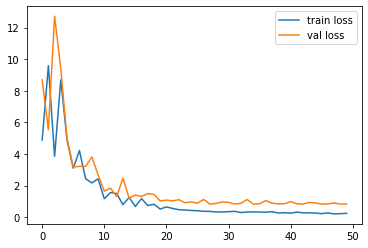

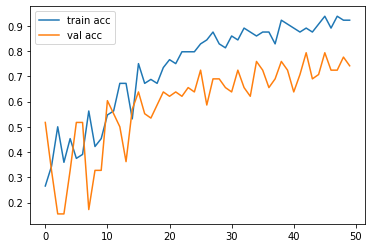

<Figure size 432x288 with 0 Axes>

In [32]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [40]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

## What is h5 file
### HDF5 file stands for Hierarchical Data Format 5. It is an open-source file which comes in handy to store large amount of data. As the name suggests, it stores data in a hierarchical structure within a single file.

In [41]:

y_pred = model.predict(test_set)


###### Arrary([probability of 1st folder, probability of 2nd folder, probability of 1st folder ])


In [42]:
y_pred    

array([[4.6058547e-01, 3.7147555e-01, 1.6793898e-01],
       [2.4411081e-01, 1.4310177e-01, 6.1278743e-01],
       [1.8126413e-01, 4.8447123e-01, 3.3426458e-01],
       [9.1390902e-01, 6.4002387e-02, 2.2088701e-02],
       [1.5028302e-02, 9.5750898e-01, 2.7462710e-02],
       [2.5094041e-01, 6.5376407e-01, 9.5295586e-02],
       [1.0995516e-01, 1.4845355e-01, 7.4159133e-01],
       [8.5353076e-01, 1.3480799e-02, 1.3298844e-01],
       [9.5398381e-02, 3.4479526e-01, 5.5980635e-01],
       [3.4208480e-02, 3.0663463e-01, 6.5915686e-01],
       [4.0563056e-01, 5.7756066e-01, 1.6808782e-02],
       [6.4264320e-02, 3.1844468e-04, 9.3541718e-01],
       [5.7161790e-01, 6.2054425e-02, 3.6632770e-01],
       [2.2512059e-01, 4.3045464e-01, 3.4442478e-01],
       [3.8592853e-02, 6.3108170e-01, 3.3032542e-01],
       [4.2821851e-02, 2.6780635e-03, 9.5450014e-01],
       [3.1259034e-02, 9.1834545e-01, 5.0395545e-02],
       [7.2641629e-01, 1.8231520e-01, 9.1268547e-02],
       [2.8813660e-01, 2.703

In [43]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1) # taking highest values of the 3 from all records

In [44]:
y_pred

array([0, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1], dtype=int64)

In [56]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [57]:
model=load_model('model_resnet50.h5')    

In [58]:
img_data

array([[[[-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         ...,
         [-103.939   , -116.77116 , -123.62902 ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        [[-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.75155 , -123.613335],
         [-103.939   , -116.74763 , -123.60941 ],
         ...,
         [-103.93508 , -116.767235, -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        [[-103.939   , -116.74763 , -123.60941 ],
         [-103.939   , -116.74763 , -123.60941 ],
         [-103.939   , -116.743706, -123.60549 ],
         ...,
         [-103.93508 , -116.767235, -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ],
         [-103.92724 , -116.76331 , -123.6251  ]],

        ...,

        [[-103.57822 , -116.27312 , -1

#### This is how the model will work on a given data !!!

In [48]:
img=image.load_img('Datasets/Test/lamborghini/10.jpg',target_size=(224,224))



In [49]:
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [95]:
x.shape

(224, 224, 3)

In [50]:
x=x/255   #rescaling of new data(image) 

In [51]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [52]:
model.predict(img_data)

array([[0.00446893, 0.00433745, 0.9911936 ]], dtype=float32)

In [53]:
a=np.argmax(model.predict(img_data), axis=1)

In [54]:
a

array([2], dtype=int64)